In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [2]:
torch.normal(0,1,(10,2)), torch.normal(0,0.1,(10,2))

(tensor([[-0.9056,  0.8687],
         [ 0.3836, -0.6133],
         [ 1.4738,  0.0612],
         [ 0.8594,  1.0436],
         [-0.5257, -0.9729],
         [-0.5781,  0.3535],
         [ 0.3665, -1.1350],
         [-0.7327,  0.1751],
         [ 0.5437, -0.1512],
         [ 0.2640,  1.8319]]),
 tensor([[-0.0535,  0.0095],
         [ 0.0986, -0.0360],
         [-0.0628, -0.1194],
         [-0.1083,  0.0108],
         [ 0.1554,  0.0275],
         [-0.0918, -0.0121],
         [-0.0137, -0.0529],
         [ 0.0449,  0.1215],
         [ 0.1300,  0.0652],
         [-0.0457,  0.0728]]))

In [3]:
# generating synthetic dataset

import numpy as np

def make_dataset(size=1000, true_weight=torch.tensor([2, -3.4]), true_bias=4.2):
    X = torch.normal(0,1, (size, len(true_weight)))
    y = torch.matmul(X,true_weight) + true_bias
    # now we add for noise, mean =0, standard deviation = 0.1
    y += torch.normal(0,0.1, y.shape)
    return X, y.reshape(-1,1) # this work same as unsqueeze

In [4]:
features, labels = make_dataset()

In [5]:
features[0], labels[0]

(tensor([ 0.2473, -0.2179]), tensor([5.3722]))

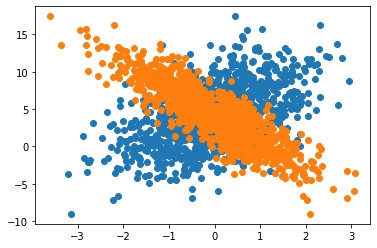

In [6]:
plt.plot(features.detach(),labels.detach(),'o')

In [7]:
# reading the dataset, and giving based on batch size

def read_iter(batch_size, features, labels):
    indices = list(range(len(features)))
    random.shuffle(indices)
    new_features = features[indices]
    new_labels = labels[indices]
    
#     print(new_features[:5], features[:5])
    for i in range(0,len(features), batch_size):
        yield new_features[i:min(i+batch_size, len(features))], new_labels[i:min(i+batch_size, len(features))]
        

In [8]:
train_dataloader= read_iter(32, features, labels)

In [9]:
for data, label in train_dataloader:
    print(data, label)
    break

tensor([[-1.9825, -0.5932],
        [ 0.2807, -1.4309],
        [ 1.1099,  0.5070],
        [-2.4576, -0.5628],
        [ 1.5967,  1.4711],
        [ 1.1042,  1.3973],
        [ 0.8297,  0.1065],
        [ 0.8073, -0.4232],
        [ 1.6603,  0.5210],
        [ 2.0255, -1.0387],
        [ 0.4897, -0.0131],
        [ 0.2289,  0.2474],
        [-1.1209,  1.7106],
        [-1.7679,  0.1346],
        [-0.7203,  0.2567],
        [ 0.6552,  0.4565],
        [-0.9368, -1.5669],
        [ 0.3844,  0.4166],
        [ 0.2013, -0.0516],
        [ 1.8502, -0.4614],
        [ 0.4938, -1.3363],
        [ 1.1231,  0.9925],
        [ 0.6538, -0.3626],
        [ 1.0349,  1.5367],
        [-0.4958,  2.5972],
        [ 1.4997,  0.8306],
        [ 0.3014, -0.0577],
        [ 0.6919,  0.5164],
        [-0.6636,  0.8898],
        [ 1.7149, -1.1485],
        [ 0.3645, -1.2133],
        [-1.1790,  1.6965]]) tensor([[ 2.2348e+00],
        [ 9.5593e+00],
        [ 4.8342e+00],
        [ 1.1740e+00],
        [ 2

In [10]:
# we before training would initialize the model
w = torch.normal(0,0.1, (2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [11]:
# define the model

def linreg(X,w,b):
    return torch.matmul(X, w) + b
    

In [12]:
#loss function

def squared_loss(y_hat, y):
#      print(y_hat.shape, y.shape)
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [13]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs =100
batch_size=32
   

In [15]:
# training loop
for epoch in range(num_epochs):
    train_dataloader= read_iter(batch_size, features, labels)
    for X, y in train_dataloader:
        l = squared_loss(linreg(X,w,b), y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        
    
    with torch.no_grad():
        train_l = squared_loss(linreg(features, w, b), labels)
#         print("Loss for current epoch ", epoch, ":", train_l.mean())
#         print("the value of w: ", w, " The value of b: ", b)
        

Loss for current epoch  0 : tensor(2.4798)
Loss for current epoch  1 : tensor(0.3639)
Loss for current epoch  2 : tensor(0.0576)
Loss for current epoch  3 : tensor(0.0129)
Loss for current epoch  4 : tensor(0.0064)
Loss for current epoch  5 : tensor(0.0054)
Loss for current epoch  6 : tensor(0.0053)
Loss for current epoch  7 : tensor(0.0053)
Loss for current epoch  8 : tensor(0.0053)
Loss for current epoch  9 : tensor(0.0053)
Loss for current epoch  10 : tensor(0.0053)
Loss for current epoch  11 : tensor(0.0052)
Loss for current epoch  12 : tensor(0.0052)
Loss for current epoch  13 : tensor(0.0052)
Loss for current epoch  14 : tensor(0.0052)
Loss for current epoch  15 : tensor(0.0052)
Loss for current epoch  16 : tensor(0.0052)
Loss for current epoch  17 : tensor(0.0052)
Loss for current epoch  18 : tensor(0.0053)
Loss for current epoch  19 : tensor(0.0052)
Loss for current epoch  20 : tensor(0.0052)
Loss for current epoch  21 : tensor(0.0052)
Loss for current epoch  22 : tensor(0.0052

In [16]:
w, torch.tensor([2, -3.4])

(tensor([[ 1.9973],
         [-3.4041]], requires_grad=True),
 tensor([ 2.0000, -3.4000]))

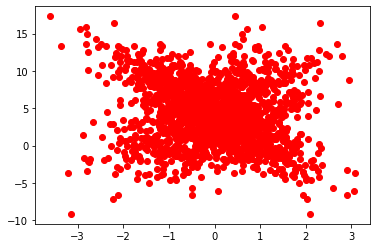

In [17]:
plt.plot(features.detach(), linreg(features,w,b).detach(), 'ro')

Exercises
1. What would happen if we were to initialize the weights to zero. Would the algorithm still
work?
2. Assume that you are Georg Simon Ohm48 trying to come up with a model between voltage
and current. Can you use auto differentiation to learn the parameters of your model?
3. Can you use Planckʼs Law49 to determine the temperature of an object using spectral energy
density?
4. What are the problems you might encounter if you wanted to compute the second derivatives? How would you fix them?
5. Why is the reshape function needed in the squared_loss function?
6. Experiment using different learning rates to find out how fast the loss function value drops.
7. If the number of examples cannot be divided by the batch size, what happens to the
data_iter functionʼs behavior?

In [18]:
#1

w = torch.zeros(2, dtype=torch.float32)

w = torch.tensor([0.,0.])
w, b

(tensor([0., 0.]), tensor([4.2046], requires_grad=True))

In [19]:
try:
    for epoch in range(num_epochs):
        for X, y in read_iter(batch_size, features, labels):
            l = squared_loss(linreg(X,w,b), y)
            l.sum().backward()

            print(w.grad, b.grad)

            sgd([w,b], lr, batch_size)

        with torch.no_grad():
            train_l = squared_loss(linreg(features, w, b), labels)
            print("Loss for current epoch ", epoch, ":", train_l.mean())

except Exception as e:
    print(e)
        
        

None tensor([14.6251])
unsupported operand type(s) for *: 'float' and 'NoneType'


In [20]:
#2 

# lets first get the values

def ohmic_values(n, r = torch.tensor([5.])):
    # V = IR
    
    I = torch.normal(0, 1,(n,len(r)))
    
    V= torch.matmul(I, r)
    
    return I, V
    
    

In [21]:
features, labels = ohmic_values(n=1000)

In [22]:
type(features), type(labels)

(torch.Tensor, torch.Tensor)

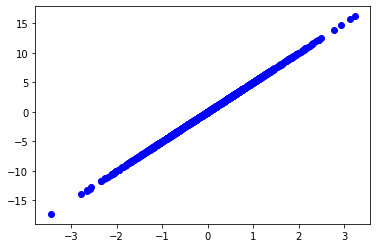

In [23]:
plt.plot(features.detach(), labels.detach(), "bo")

In [24]:
# initialising w and b

w =  torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

In [25]:
features.shape, w.shape

(torch.Size([1000, 1]), torch.Size([1]))

In [26]:
# now lets get the model 

def linreg_ohm(X, w, b):
    return torch.matmul(X,w) + b

linreg_ohm(features, w, b)[:5]
    

tensor([0.1685, 3.0204, 2.0501, 1.6815, 0.9602], grad_fn=<SliceBackward>)

In [27]:
def training_loop(num_epochs=3, loss=squared_loss, sgd=sgd, data_iter=read_iter, net=linreg, lr=lr, batch_size=batch_size, w=w, b=b, features=features, display=True, labels=labels):
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size,features, labels):
            l = loss(net(X,w,b), y)
            
            l.sum().backward()
            
            sgd([w,b], lr, batch_size)
        
        if(display):
            with torch.no_grad():
                train_l = loss(net(features, w, b), labels)
            
                print(f"for epoch: {epoch}, the loss: {train_l.mean()}")
            
        

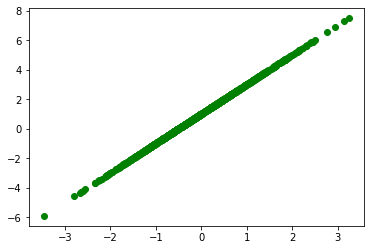

In [28]:
plt.plot(features.detach(), linreg_ohm(features, w, b).detach(), "go")

In [29]:
training_loop(net=linreg_ohm )

for epoch: 0, the loss: 0.7398536801338196
for epoch: 1, the loss: 0.10889293253421783
for epoch: 2, the loss: 0.01603986695408821


In [30]:
w, b

(tensor([4.8301], requires_grad=True), tensor([0.0551], requires_grad=True))

In [31]:
training_loop(net=linreg_ohm, num_epochs=4)

for epoch: 0, the loss: 0.002362377243116498
for epoch: 1, the loss: 0.0003480184532236308
for epoch: 2, the loss: 5.1183818868594244e-05
for epoch: 3, the loss: 7.538485988334287e-06


In [32]:
w, b

(tensor([4.9963], requires_grad=True), tensor([0.0012], requires_grad=True))

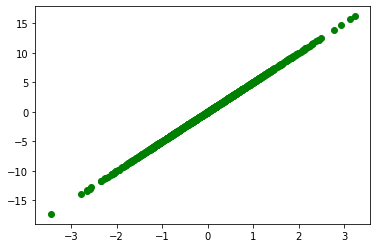

In [33]:
plt.plot(features.detach(), linreg_ohm(features, w, b).detach(), "go")

#3

formula for spectral density:

![](spectral_density.png)

In [34]:
def spectral_density_formula(t, l=1):
    # lets put l =1
    h = 6.626 * (10 ** -34)
    c = 3 * (10 ** 8)
    l = l
    k = 1.38064852 * (10 ** -23)
    p =  (2 * h * (c**2))/(l ** 5)
    d = (h * c/(l * k * t))
    
    return p/(np.exp(d)-1)

In [35]:
spectral_density_formula(100)

8.2832947943081e-13

In [36]:
w =  torch.tensor([10.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

In [37]:
def make_dataset(n=100):
    X = torch.arange(100, dtype=torch.float32).unsqueeze(dim=1)
    print(X.shape)
    y = []
    for i in X.detach():
        y.append(spectral_density_formula(i))
    
    return X, torch.tensor(y)

In [38]:
features, labels = make_dataset()

torch.Size([100, 1])


In [39]:
features[:10], labels[:10]

# maybe noramlisation would be a problem here

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([0.0000e+00, 8.2244e-15, 1.6508e-14, 2.4792e-14, 3.3076e-14, 4.1360e-14,
         4.9645e-14, 5.7929e-14, 6.6210e-14, 7.4497e-14]))

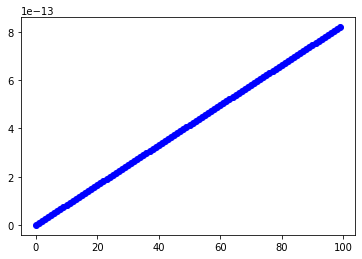

In [40]:
plt.plot(features, labels, "bo")

In [41]:
w, b

(tensor([10.], requires_grad=True), tensor([1.], requires_grad=True))

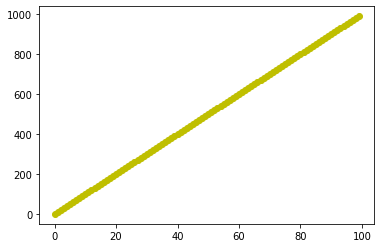

In [42]:
plt.plot(features.detach(), linreg(features,w, b).detach(), 'yo')

In [43]:
for lr in [0.00001, 0.0001, 0.001, 0.1]:
    print(f"\nFor learning rate {lr}")
    training_loop(num_epochs=10, lr = lr)


For learning rate 1e-05
for epoch: 0, the loss: 7.538003501394996e-06
for epoch: 1, the loss: 7.537736109952675e-06
for epoch: 2, the loss: 7.537254987255437e-06
for epoch: 3, the loss: 7.536767952842638e-06
for epoch: 4, the loss: 7.536350494774524e-06
for epoch: 5, the loss: 7.536014436482219e-06
for epoch: 6, the loss: 7.535535132774385e-06
for epoch: 7, the loss: 7.535053100582445e-06
for epoch: 8, the loss: 7.534572887379909e-06
for epoch: 9, the loss: 7.534155429311795e-06

For learning rate 0.0001
for epoch: 0, the loss: 7.475226993847173e-06
for epoch: 1, the loss: 7.421631380566396e-06
for epoch: 2, the loss: 7.3684418566699605e-06
for epoch: 3, the loss: 7.313570222322596e-06
for epoch: 4, the loss: 7.2589568844705354e-06
for epoch: 5, the loss: 7.206368081824621e-06
for epoch: 6, the loss: 7.152001217036741e-06
for epoch: 7, the loss: 7.1015633693605196e-06
for epoch: 8, the loss: 7.047742201393703e-06
for epoch: 9, the loss: 6.994247542024823e-06

For learning rate 0.001
f

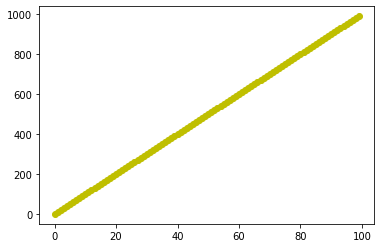

In [44]:
plt.plot(features.detach(), linreg(features,w, b).detach(), 'yo')

In [45]:
w, b

(tensor([10.], requires_grad=True), tensor([1.], requires_grad=True))

# Concise way to build linear networks

In [46]:
true_weight= torch.tensor([2, -3.4])
true_bias = 4.2

In [47]:
def make_dataset(size=1000, true_weight=torch.tensor([2, -3.4]), true_bias=4.2):
    X = torch.normal(0,1, (size, len(true_weight)))
    y = torch.matmul(X,true_weight) + true_bias
    # now we add for noise, mean =0, standard deviation = 0.1
    y += torch.normal(0,0.1, y.shape)
    return X, y.reshape(-1,1) # this work same as unsqueeze
features, labels = make_dataset(true_weight=true_weight, true_bias=4.2)

In [48]:
from torch.utils import data
batch_size=32

In [49]:
# reading the dataset

def read_dataset(data_arrays):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset=dataset, shuffle=True, batch_size=batch_size)

In [50]:
train_dataloader = read_dataset((features, labels))

In [51]:
for X, y in train_dataloader:
    print(X[:5], y[:5])
    break

tensor([[ 0.3404, -0.7829],
        [-3.2048,  0.5152],
        [ 0.4525, -0.0167],
        [-0.4878,  0.1842],
        [ 0.7667, -0.9466]]) tensor([[ 7.3954],
        [-4.3338],
        [ 5.0515],
        [ 2.6490],
        [ 9.0023]])


In [52]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [53]:
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [54]:
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)

tensor([0.])

In [55]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[0.0782, 0.0277]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True))

In [56]:
loss = nn.MSELoss(reduction='sum')

In [57]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [58]:
for epoch in range(3):
    for X, y in train_dataloader:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    
    l = loss(net(features), labels)
    print(f'for epoch {epoch}, loss : {l}')

for epoch 0, loss : 42.17301940917969
for epoch 1, loss : 24.687911987304688
for epoch 2, loss : 10.105912208557129


In [59]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[ 2.0110, -3.4159]], requires_grad=True),
 Parameter containing:
 tensor([4.2184], requires_grad=True))

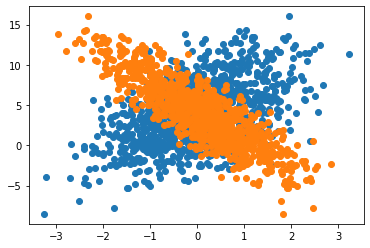

In [60]:
plt.plot(features.detach(), net(features).detach(), 'o')

### Exercises
1. If we replace nn.MSELoss(reduction='sum') with nn.MSELoss(), how can we change the
learning rate for the code to behave identically. Why?
2. Review the PyTorch documentation to see what loss functions and initialization methods are
provided. Replace the loss by Huberʼs loss.
3. How do you access the gradient of net[0].weight?

In [61]:
# 3
net[0].weight.grad

tensor([[ 1.5251, -1.0161]])

In [62]:
# 2

loss = torch.nn.SmoothL1Loss

# Practice

In [63]:
# creating a dataset

num_of_features = 3

actual_w = torch.tensor([-1,-1,-1], dtype=torch.float32)
actual_b = torch.tensor([-4], dtype=torch.float32)

def make_dataset(n=1000):
    X = torch.normal(0,1, (n,num_of_features))
    y = torch.matmul(X, actual_w) + actual_b
    
    return X, y

In [64]:
features, labels = make_dataset()

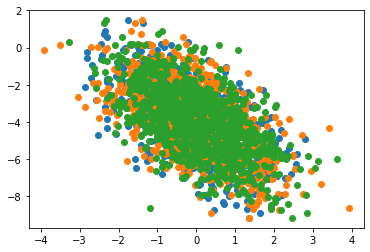

In [65]:
plt.plot(features, labels, 'o')

In [66]:
features.shape, labels.shape

(torch.Size([1000, 3]), torch.Size([1000]))

In [109]:
# initialising the model parameters
w = torch.normal(0,0.1,size=(num_of_features,1), dtype=torch.float32,requires_grad=True) # assuming there are three features of x that matter
b = torch.tensor([0.], dtype=torch.float32, requires_grad=True)


In [68]:
# creating the model

def net(X, w=w, b=b):
    return torch.matmul(X,w) + b

In [84]:
# creating a loss function

def loss_function(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2 )/2

In [115]:
# creating the optimizer
batch_size = 32
learning_rate = 0.01 

def optimizer_sgd(params=[w,b],batch_size=batch_size, learning_rate=learning_rate):
    
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad/ batch_size
            param.grad.zero_()
    
    

In [102]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [71]:
# creating a data iterator

def data_iter(features=features, labels=labels, batch_size=batch_size):
    
    indices = list(range(len(features)))
    
    random.shuffle(indices)
    
#     print(indices[:5])
    
    for i in range(len(features), batch_size):
        batch_indices = min(indices[i:batch_size], indices[i: len(features)])
        yield features[batch_indices], labels[batch_indices]
    
    
    

In [72]:
for X, y in data_iter():
    print(X)
    break
    
## not working

In [73]:
class Train_dataset:
    def __init__(self,features=features, labels=labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return features[index], labels[index]

In [74]:
train_data = Train_dataset()

In [75]:
train_dataloader = data.DataLoader(dataset=train_data,shuffle=True,batch_size=32)

In [116]:
# training loop

num_epochs = 30

def training_loop(display=False,num_epochs=num_epochs, net=net, optimizer=optimizer_sgd, loss_function=loss_function, train_loader=train_dataloader, w=w, b=b):
    for epoch in range(num_epochs):
        for X, y in train_dataloader:
            
            l = loss_function(net(X), y)
            l.sum().backward()
#             optimizer(params=[w,b], lr=0.01, batch_size=batch_size)
            optimizer(params=[w,b])
        if display:
            with torch.no_grad():
                print("loss on latest minibatch: ", l.mean().detach() , " for epoch ", epoch)
    
    print(w.detach(),b.detach())
    

In [117]:
training_loop(display=True)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

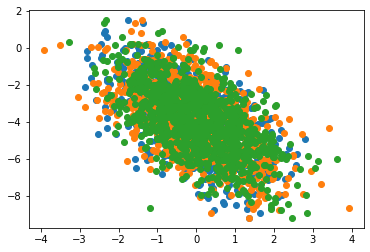

In [108]:
plt.plot(features, net(features).detach(), "o")